In [10]:
import diffusers
from diffusers import DDPMPipeline, DDPMScheduler, UNet2DModel
from diffusers.optimization import get_scheduler
import diffusers
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
)
from transformers import CLIPTextModel, CLIPTokenizer

pretrained_model_name_or_path = "CompVis/stable-diffusion-v1-4"
unet_config = UNet2DModel.load_config(
    pretrained_model_name_or_path,
    subfolder="unet",
)
# model = UNet2DModel.from_pretrained(config)
noise_scheduler = DDPMScheduler.from_pretrained(
    pretrained_model_name_or_path,
    subfolder="scheduler",
)
# text_encoder = CLIPTextModel.from_pretrained(
#     pretrained_model_name_or_path,
#     subfolder="text_encoder",
# )
# vae = AutoencoderKL.from_pretrained(
#     pretrained_model_name_or_path,
#     subfolder="vae",
# )

unet = UNet2DConditionModel.from_pretrained(
    pretrained_model_name_or_path,
    subfolder="unet",
)
unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_fe

In [15]:
resolution = 512
UNet2DModel(
    sample_size=resolution,
    in_channels=3,
    out_channels=3,
    layers_per_block=2,
    block_out_channels=[320, 640, 1280, 1280],
    down_block_types=[
        "AttnDownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
        "DownBlock2D",
    ],
    up_block_types=[
        "UpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "AttnUpBlock2D",
    ],
    attention_head_dim=8,
)

UNet2DModel(
  (conv_in): Conv2d(3, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): AttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Attention(
          (group_norm): GroupNorm(32, 320, eps=1e-05, affine=True)
          (to_q): Linear(in_features=320, out_features=320, bias=True)
          (to_k): Linear(in_features=320, out_features=320, bias=True)
          (to_v): Linear(in_features=320, out_features=320, bias=True)
          (to_out): ModuleList(
            (0): Linear(in_features=320, out_features=320, bias=True)
            (1): Dropout(p=0.0, inplace=False)
          )
        )
      )
      (resnets): ModuleList(
        (0-1): 2 x ResnetBlock2D(
          (norm1): GroupNorm(32, 320, ep

In [11]:
unet_config

{'_class_name': 'UNet2DConditionModel',
 '_diffusers_version': '0.2.2',
 'act_fn': 'silu',
 'attention_head_dim': 8,
 'block_out_channels': [320, 640, 1280, 1280],
 'center_input_sample': False,
 'cross_attention_dim': 768,
 'down_block_types': ['CrossAttnDownBlock2D',
  'CrossAttnDownBlock2D',
  'CrossAttnDownBlock2D',
  'DownBlock2D'],
 'downsample_padding': 1,
 'flip_sin_to_cos': True,
 'freq_shift': 0,
 'in_channels': 4,
 'layers_per_block': 2,
 'mid_block_scale_factor': 1,
 'norm_eps': 1e-05,
 'norm_num_groups': 32,
 'out_channels': 4,
 'sample_size': 64,
 'up_block_types': ['UpBlock2D',
  'CrossAttnUpBlock2D',
  'CrossAttnUpBlock2D',
  'CrossAttnUpBlock2D']}

## img2img pipeline

In [2]:
from datasets import load_dataset

dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
dataset = load_dataset(
    dataset_name,
    cache_dir="/code/dataset/nfs_pix2pix_1920_1080_v5",
)
dataset = dataset["train"]

In [2]:
# dataset[0]["input_image"]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/user-name-goes-here/.cache/huggingface/hub/models--stablediffusionapi--juggernaut-reborn/snapshots/503c10eb43ae47953e8020dec7642139fa053585/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an e

  0%|          | 0/1 [00:00<?, ?it/s]

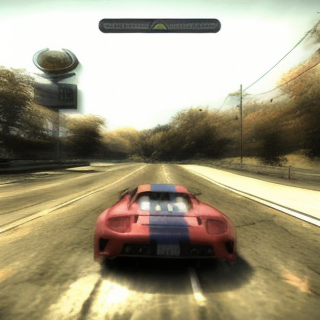

In [ ]:
import torch
from torchvision import transforms
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_id_or_path = "stablediffusionapi/juggernaut-reborn"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path, torch_dtype=torch.float16
)
pipe = pipe.to(device)


valid_transforms = transforms.Compose(
    [
        transforms.Resize(
            320,
            interpolation=transforms.InterpolationMode.LANCZOS,
        ),
        transforms.CenterCrop(320),
    ]
)
prompt = "0"
init_image = valid_transforms(dataset[400]["input_image"].convert("RGB"))
pipe(
    prompt=prompt,
    image=init_image,
    strength=1.0,
    guidance_scale=1.0,
    num_inference_steps=1,
).images[0]

In [ ]:
from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
    StableDiffusionImg2ImgPipeline,
    AutoencoderTiny,
)
from transformers import CLIPTextModel, CLIPTokenizer
import torch

model_name_or_path = "stabilityai/sd-turbo"
noise_scheduler = DDPMScheduler.from_pretrained(
    # model_name_or_path,
    "stabilityai/sd-turbo",
    subfolder="scheduler",
)
noise_scheduler.set_timesteps(1, device="cuda")
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.cuda()

tokenizer = CLIPTokenizer.from_pretrained(
    model_name_or_path,
    subfolder="tokenizer",
)
weight_dtype = torch.bfloat16
text_encoder = CLIPTextModel.from_pretrained(
    model_name_or_path,
    subfolder="text_encoder",
    torch_dtype=weight_dtype,
)
checkpt_path = "/code/checkpoints/auto_remaster/sd1.5_ddpm/checkpoint-14800"

vae = AutoencoderTiny.from_pretrained(
    checkpt_path,
    torch_device="cuda",
    subfolder="vae",
    torch_dtype=weight_dtype,
)
# unet_path = "/code/checkpoints/sd-naruto-model/checkpoint-200/"
unet = UNet2DConditionModel.from_pretrained(
    checkpt_path,
    subfolder="unet",
    torch_dtype=weight_dtype,
)
unet.set_attention_backend("flash")

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False).cuda()
text_encoder.requires_grad_(False).cuda()
unet.requires_grad_(False).cuda()
None

`torch_dtype` is deprecated! Use `dtype` instead!
The config attributes {'block_out_channels': [64, 64, 64, 64]} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.
Attention backends are an experimental feature and the API may be subject to change.


In [1]:
from datasets import load_dataset

dataset_name = "dim/nfs_pix2pix_1920_1080_v5"
dataset = load_dataset(
    dataset_name,
    cache_dir="/code/dataset/nfs_pix2pix_1920_1080_v5",
)
dataset = dataset["train"]

WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.9.0+cu130 with CUDA 1300 (you have 2.9.0+cu128)
    Python  3.10.19 (you have 3.11.14)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
`torch_dtype` is deprecated! Use `dtype` instead!
The config attributes {'block_out_channels': [64, 64, 64, 64]} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.


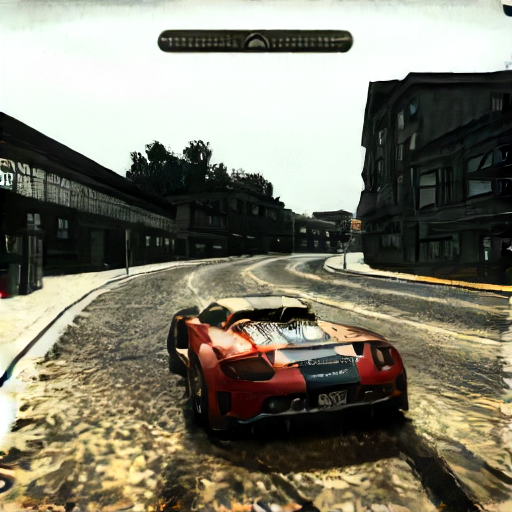

In [2]:
import torchvision.transforms.functional as F

import torch
from torchvision import transforms

from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
    StableDiffusionImg2ImgPipeline,
    AutoencoderTiny,
    UNet2DModel,
)
from transformers import CLIPTextModel, CLIPTokenizer
import torch

# weight_dtype = torch.bfloat16
weight_dtype = torch.float32
model_name_or_path = "stabilityai/sd-turbo"
noise_scheduler = DDPMScheduler.from_pretrained(
    # model_name_or_path,
    "stabilityai/sd-turbo",
    subfolder="scheduler",
)
noise_scheduler.set_timesteps(1, device="cuda")
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.to(
    device="cuda", dtype=weight_dtype
)
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.to(
    device="cuda", dtype=weight_dtype
)
noise_scheduler.betas = noise_scheduler.betas.to(
    device="cuda",
    dtype=weight_dtype,
)
noise_scheduler.alphas = noise_scheduler.alphas.to(
    device="cuda",
    dtype=weight_dtype,
)

tokenizer = CLIPTokenizer.from_pretrained(
    model_name_or_path,
    subfolder="tokenizer",
)

text_encoder = CLIPTextModel.from_pretrained(
    model_name_or_path,
    subfolder="text_encoder",
    torch_dtype=weight_dtype,
)
checkpt_path = "/code/checkpoints/auto_remaster/sd1.5_ddpm/checkpoint-14800"

vae = AutoencoderTiny.from_pretrained(
    checkpt_path,
    torch_device="cuda",
    subfolder="vae",
    torch_dtype=weight_dtype,
)
vae.decoder.ignore_skip = False
# unet_path = "/code/checkpoints/sd-naruto-model/checkpoint-200/"
# unet = UNet2DConditionModel.from_pretrained(
unet = UNet2DModel.from_pretrained(
    checkpt_path,
    subfolder="unet",
    torch_dtype=weight_dtype,
)
# unet.set_attention_backend("flash")

# Freeze vae and text_encoder and set unet to trainable
vae.requires_grad_(False).cuda()
text_encoder.requires_grad_(False).cuda()
unet.requires_grad_(False).cuda()
None

device = "cuda"

size = 512
valid_transforms = transforms.Compose(
    [
        transforms.Resize(
            size,
            interpolation=transforms.InterpolationMode.LANCZOS,
        ),
        transforms.CenterCrop(size),
    ]
)
noise_scheduler.set_timesteps(1, device="cuda")
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.cuda()

pos = 30
input_image = dataset[pos]["input_image"].convert("RGB")
prompt = dataset[0]["edit_prompt"]
target_image = valid_transforms(dataset[pos]["edited_image"].convert("RGB"))

i_t = valid_transforms(input_image)
c_t = F.to_tensor(i_t)
# c_t = transforms.Normalize([0.5], [0.5])(c_t).unsqueeze(0)
c_t = c_t.unsqueeze(0)
c_t = c_t.cuda().to(weight_dtype)
timesteps = torch.tensor([999], device="cuda").long()
# dummy_text = tokenizer(
#     "0",
#     return_tensors="pt",
# ).input_ids.to("cuda")
# dummy_emb = text_encoder(
#     dummy_text,
#     return_dict=False,
# )[0]
with torch.no_grad():
    encoded_control = vae.encode(c_t)[0] * vae.config.scaling_factor
    model_pred = unet(
        encoded_control,
        timesteps,
        # dummy_emb,
        return_dict=False,
    )[0]
    # pipeline.scheduler.num_inference_steps = 0
    # pipeline.scheduler.custom_timesteps = False
    x_denoised = noise_scheduler.step(
        model_pred,
        timesteps,
        encoded_control,
        return_dict=False,
    )[0]
    output_image = (
        vae.decode(
            x_denoised / vae.config.scaling_factor,
            return_dict=False,
        )[0]
    ).clamp(-1, 1)
    # c_t.shape
    # encoded_control.shape
model_pred.shape
transforms.ToPILImage()((output_image[0] * 0.5 + 0.5).float().cpu())

In [4]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() )
# unet 246_175_044
count_parameters(unet)

246175044

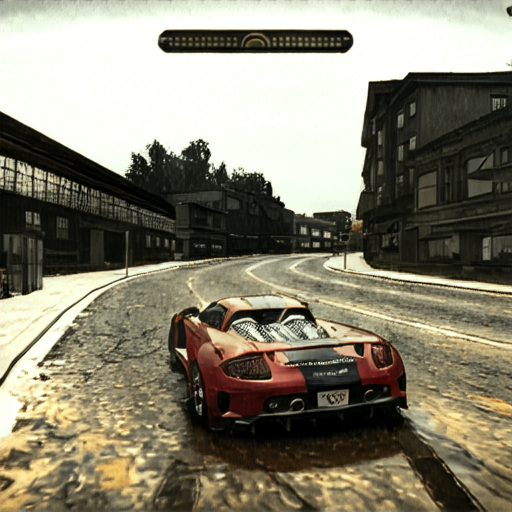

In [10]:
x_denoised = noise_scheduler.step(
    model_pred,
    timesteps,
    encoded_control,
    return_dict=False,
)[0]
output_image = (
    vae.decode(
        x_denoised / vae.config.scaling_factor,
        return_dict=False,
    )[0]
).clamp(-1, 1)
# c_t.shape
# encoded_control.shape
model_pred.shape
# transforms.ToPILImage()((output_image[0] * 0.5 + 0.5).float().cpu())
transforms.ToPILImage()((output_image[0] * 0.5 + 0.5).float().cpu())

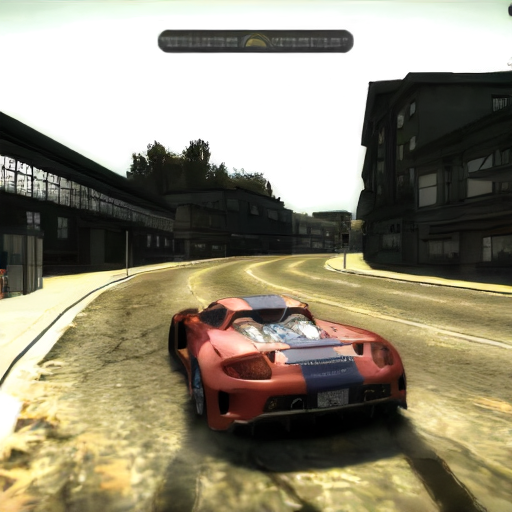

In [17]:
vae = AutoencoderTiny.from_pretrained(
    # checkpt_path,
    "madebyollin/taesd",
    torch_device="cuda",
    # subfolder="vae",
    torch_dtype=weight_dtype,
)
vae.decoder.ignore_skip = False
vae.cuda()
norm = transforms.Normalize([0.5], [0.5])(c_t)
encoded_control = vae.encode(norm)[0] * vae.config.scaling_factor
output_image = (
    vae.decode(
        encoded_control / vae.config.scaling_factor,
        return_dict=False,
    )[0]
).clamp(-1, 1)
transforms.ToPILImage()((output_image[0] * 0.5 + 0.5).float().cpu())

The config attributes {'block_out_channels': [64, 64, 64, 64]} were passed to AutoencoderTiny, but are not expected and will be ignored. Please verify your config.json configuration file.


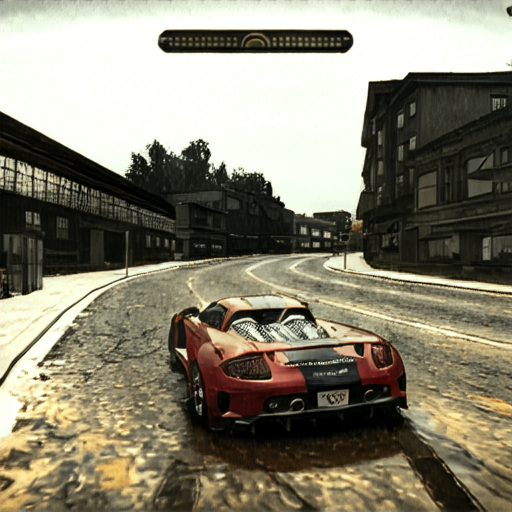

In [7]:
import torchvision.transforms.functional as F

import torch
from torchvision import transforms

from diffusers import (
    AutoencoderKL,
    DDPMScheduler,
    StableDiffusionPipeline,
    UNet2DConditionModel,
    StableDiffusionImg2ImgPipeline,
    AutoencoderTiny,
    UNet2DModel,
)
from transformers import CLIPTextModel, CLIPTokenizer
import torch

weight_dtype = torch.float32
device = "cuda"
# checkpoint_path = "/code/checkpoints/auto_remaster/sd1.5_ddpm/checkpoint-400"
checkpoint_path = "/code/checkpoints/auto_remaster/sd1.5_ddpm/checkpoint-14800"
vae = AutoencoderTiny.from_pretrained(
    checkpoint_path,
    torch_device="cuda",
    subfolder="vae",
    torch_dtype=weight_dtype,
).to(device)
vae.decoder.ignore_skip = False

unet = UNet2DModel.from_pretrained(
    checkpoint_path,
    subfolder="unet",
    torch_dtype=weight_dtype,
).to(device)

noise_scheduler = DDPMScheduler.from_pretrained(
    "stabilityai/sd-turbo",
    subfolder="scheduler",
)
noise_scheduler.set_timesteps(1, device="cuda")

noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.to(
    device=device, dtype=weight_dtype
)
noise_scheduler.alphas_cumprod = noise_scheduler.alphas_cumprod.to(
    device=device, dtype=weight_dtype
)
noise_scheduler.betas = noise_scheduler.betas.to(device=device, dtype=weight_dtype)
noise_scheduler.alphas = noise_scheduler.alphas.to(device=device, dtype=weight_dtype)

images = []
resolution = 512
timesteps = torch.tensor([999], device="cuda:0")
train_transforms_input = transforms.Compose(
    [
        transforms.Resize(
            resolution,
            interpolation=transforms.InterpolationMode.LANCZOS,
        ),
        transforms.CenterCrop(resolution),
        transforms.ToTensor(),
    ]
)
pos = 30
input_image = dataset[pos]["input_image"].convert("RGB")
c_t = train_transforms_input(input_image).unsqueeze(0).to(vae.dtype).to(vae.device)
with torch.no_grad():
    encoded_control = vae.encode(c_t, False)[0] * vae.config.scaling_factor
    model_pred = unet(
        encoded_control,
        timesteps,
        # dummy_emb,
        return_dict=False,
    )[0]
    x_denoised = noise_scheduler.step(
        model_pred,
        timesteps,
        encoded_control,
        return_dict=False,
    )[0].to(vae.dtype)
    output_image = (
        vae.decode(
            x_denoised / vae.config.scaling_factor,
            return_dict=False,
        )[0]
    ).clamp(-1, 1)
    pred_image = transforms.ToPILImage()(output_image[0].cpu().float() * 0.5 + 0.5)

pred_image

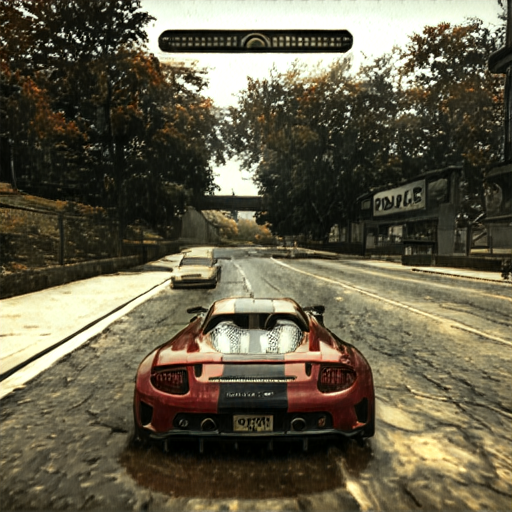

In [11]:
pos = 180
input_image = dataset[pos]["input_image"].convert("RGB")
c_t = train_transforms_input(input_image).unsqueeze(0).to(vae.dtype).to(vae.device)
with torch.no_grad():
    encoded_control = vae.encode(c_t, False)[0] * vae.config.scaling_factor
    model_pred = unet(
        encoded_control,
        timesteps,
        # dummy_emb,
        return_dict=False,
    )[0]
    x_denoised = noise_scheduler.step(
        model_pred,
        timesteps,
        encoded_control,
        return_dict=False,
    )[0].to(vae.dtype)
    output_image = (
        vae.decode(
            x_denoised / vae.config.scaling_factor,
            return_dict=False,
        )[0]
    ).clamp(-1, 1)
    pred_image = transforms.ToPILImage()(output_image[0].cpu().float() * 0.5 + 0.5)

pred_image